In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集，训练集比例为0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练SVM模型，使用线性核函数，随机种子42
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = svm_model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印评估结果
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# 打印分类报告，包括每个类别的精确率、召回率、F1分数和支持数
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Dataset description: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as 

Accuracy: 0.6710875331564987
Recall: 0.6710875331564987
F1 Score: 0.6516658938497776


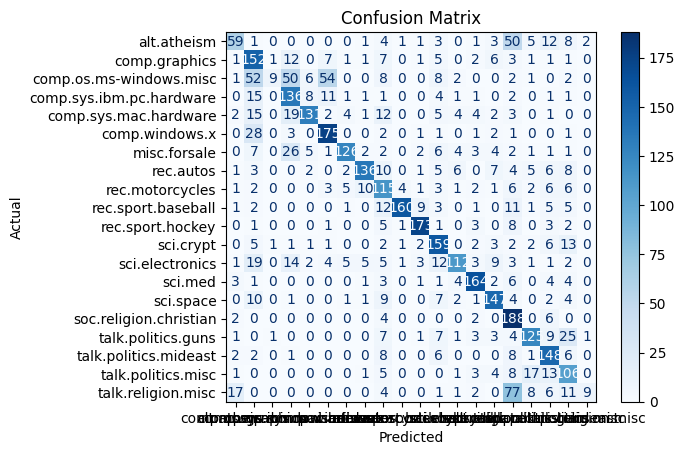

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

newsgroups = fetch_20newsgroups(subset='all', categories=None, remove=('headers', 'footers', 'quotes'))

# 查看类别标签和数据集描述
print("Categories:", newsgroups.target_names)
print("Dataset description:", newsgroups.DESCR)

# 查看数据样本
print("First document:\n", newsgroups.data[0])
print("\nFirst document target:", newsgroups.target_names[newsgroups.target[0]])

# 将文本数据转换为词袋模型
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)

# 将数据集分为训练集和测试集，训练集比例0.2（注意：这里应该是训练集占0.8，测试集占0.2）
X_train, X_test, y_train, y_test = train_test_split(X, newsgroups.target, test_size=0.2, random_state=42)

# 创建并训练朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = clf.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 画出混淆矩阵
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


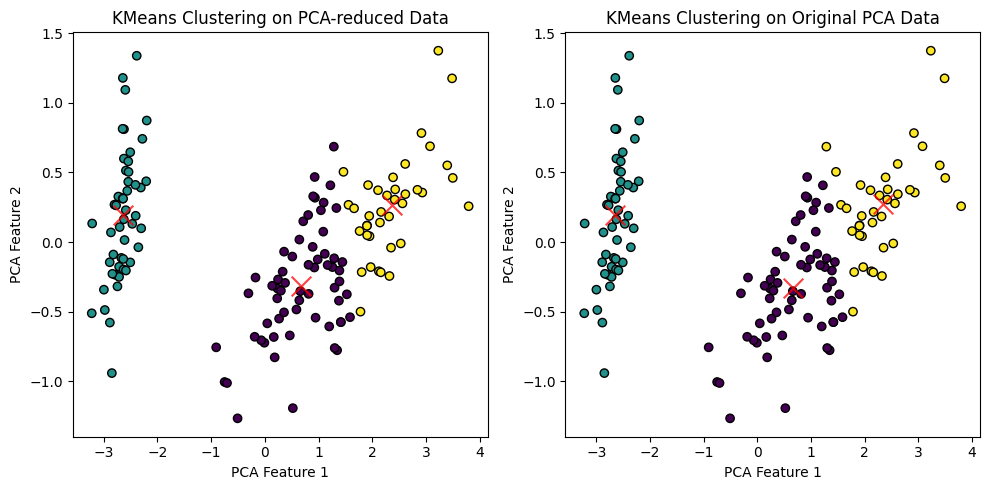

Silhouette Coefficient for original data clustering: 0.5528190123564095
Silhouette Coefficient for PCA-reduced data clustering: 0.597676421954799


D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by

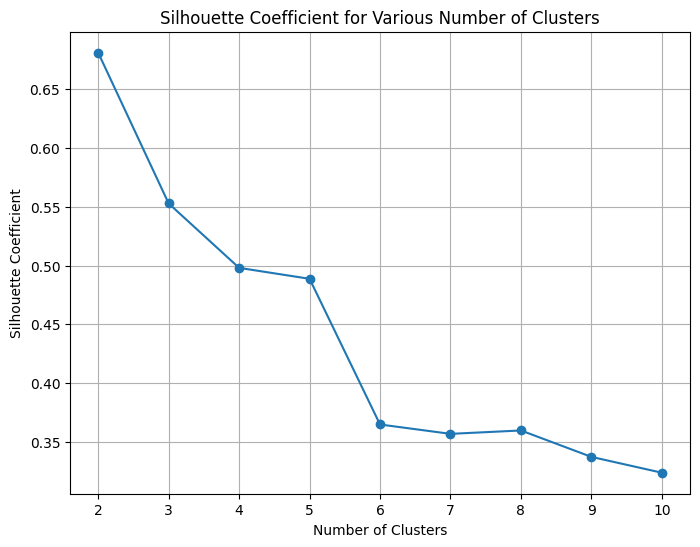

D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\soft\ai\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by

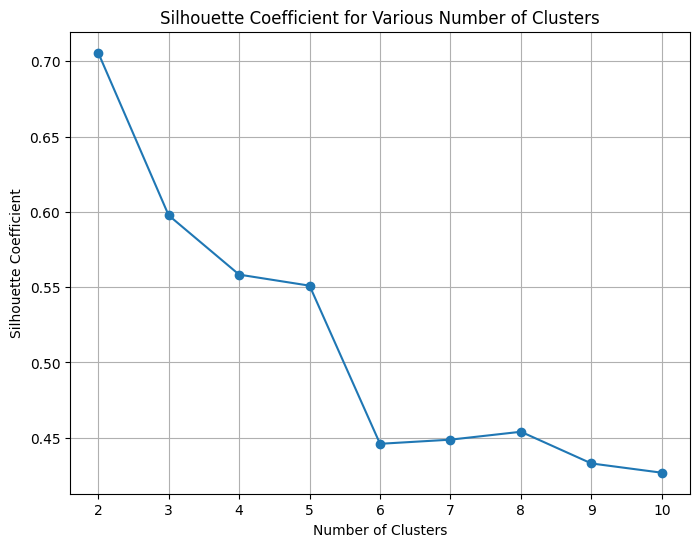

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['OMP_NUM_THREADS'] = '1'

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 使用k-means进行聚类，设定3个簇，并设置随机种子
kmeans = KMeans(n_clusters=3,random_state=0)
clusters = kmeans.fit_predict(X)

# 应用PCA将数据降维至2D空间，以便可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化原始数据的k-means聚类结果（在PCA降维后的2D空间中）
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.title('KMeans Clustering on PCA-reduced Data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# 尝试先降维后聚类，并输出可视化结果
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', marker='o', edgecolor='k')
centers_pca = kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.title('KMeans Clustering on Original PCA Data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.tight_layout()
plt.show()

# 使用轮廓系数比较聚类效果
silhouette_avg_original = silhouette_score(X, clusters)
silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)

print(f'Silhouette Coefficient for original data clustering: {silhouette_avg_original}')
print(f'Silhouette Coefficient for PCA-reduced data clustering: {silhouette_avg_pca}')

# 绘制轮廓系数与聚类数的关系图
def plot_silhouette_scores(X):
    range_n_clusters = list(range(2, 11))
    silhouette_scores = []
    
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range_n_clusters, silhouette_scores, marker='o')
    plt.title('Silhouette Coefficient for Various Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.grid(True)
    plt.show()

# 对原始数据和PCA降维后的数据分别绘制轮廓系数图
plot_silhouette_scores(X)
plot_silhouette_scores(X_pca)